                                    

MACHINEHACK  GENPACT| GOOGLE FOR DEVELOPERS SUSTAINABILITY HACKATHON


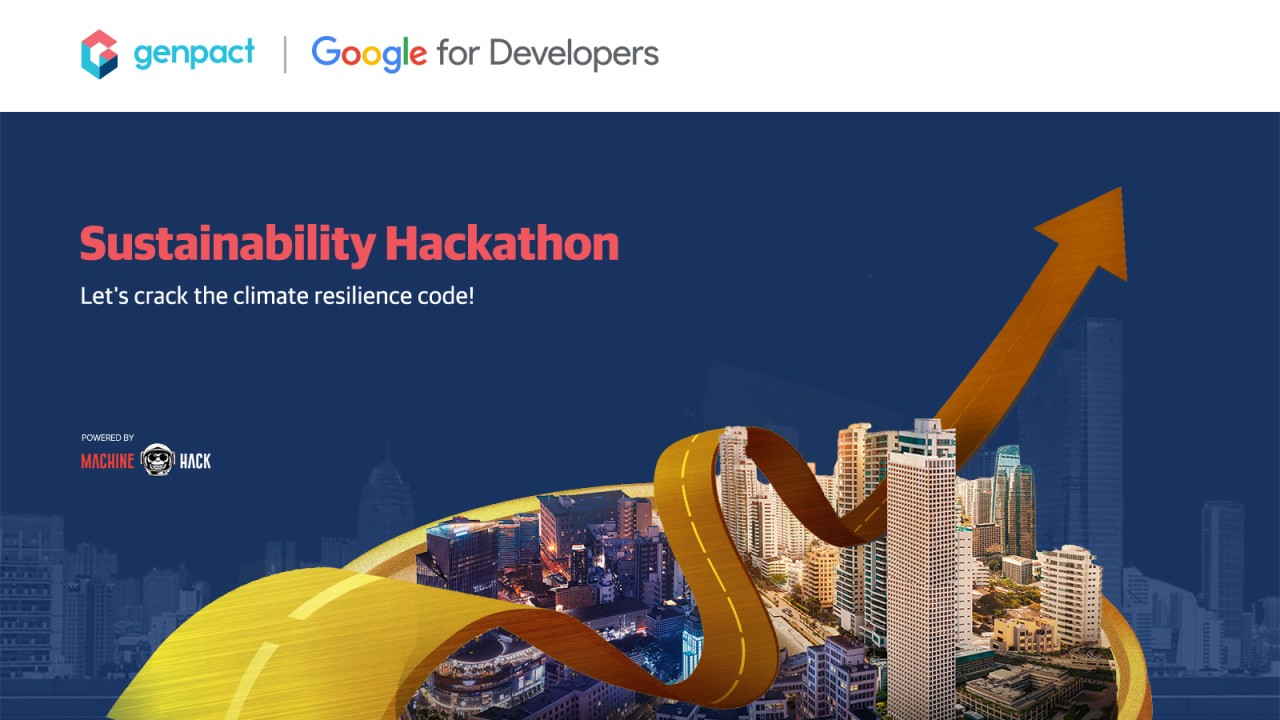


In [2]:
# importing the necessary libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

FEATURE ENGINEERING

In [3]:
df1 = pd.read_csv("soilrainfall.csv")
df1.head()

,State Name,SOIL TYPE PERCENT (Percent),Year_Rainfall,ANNUAL NORMAL RAINFALL (Millimeters)
0,Chhattisgarh,LOAMY ALFISOLS - 60% ; USTALF/USTOLLS - 40%,Average 30 years,1277
1,Chhattisgarh,LOAMY ALFISOL - 100%,Average 30 years,1535
2,Chhattisgarh,USTALF/USTOLLS - 50% ; LOAMY ALFISOLS - 25% ; ...,Average 30 years,1388
3,Chhattisgarh,USTALF/USTOLLS - 100%,Average 30 years,1327
4,Chhattisgarh,USTALF/USTOLLS - 100%,Average 30 years,1628


In [4]:
df2 = pd.read_csv("commodityprices.csv")
df2.head()

,Year,Cotton_Price[Dollar/ton]
0,1975,1055.792518
1,1976,1582.035312
2,1977,1399.933700
3,1978,1350.109288
4,1979,1428.152836


In [5]:
df1.shape

(313, 4)

In [6]:
df2.shape

(48, 2)

In [7]:
df1.describe()

,ANNUAL NORMAL RAINFALL (Millimeters)
count,313.000000
mean,1204.571885
std,636.098733
min,-1.000000
25%,813.000000
50%,1079.000000
75%,1391.000000
max,3667.000000


In [8]:
df2.describe()

,Year,Cotton_Price[Dollar/ton]
count,48.00,48.000000
mean,1998.50,849.508980
std,14.00,751.629995
min,1975.00,0.000000
25%,1986.75,0.000000
50%,1998.50,1193.250575
75%,2010.25,1503.605955
max,2022.00,2048.091980


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   State Name                            313 non-null    object
 1   SOIL TYPE PERCENT (Percent)           310 non-null    object
 2   Year_Rainfall                         313 non-null    object
 3   ANNUAL NORMAL RAINFALL (Millimeters)  313 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.9+ KB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      48 non-null     int64  
 1   Cotton_Price[Dollar/ton]  48 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 896.0 bytes


ONE HOT ENCODING

In [11]:
df1['Year_Rainfall']=df1['Year_Rainfall'].replace({'Average 30 years':1, 'other':0})
df1
df1['State Name']=df1['State Name'].replace({'Uttar Pradesh':1,'Madhya Pradesh':2,'Rajasthan':3,'Maharashtra':4,'Karnataka':5,'Gujarat':6,'West Bengal':7,'Orissa':8,'Punjab':9,'Bihar':10,'Andhra Pradesh':11,'Himachal Pradesh':12,'Kerala':13,'Assam':14,'Telangana':15,'Uttarakhand':16,'Haryana':17,'Chhattisgarh':18,'Jharkhand':19,'Tamil Nadu':20})
df1

,State Name,SOIL TYPE PERCENT (Percent),Year_Rainfall,ANNUAL NORMAL RAINFALL (Millimeters)
0,18,LOAMY ALFISOLS - 60% ; USTALF/USTOLLS - 40%,1,1277
1,18,LOAMY ALFISOL - 100%,1,1535
2,18,USTALF/USTOLLS - 50% ; LOAMY ALFISOLS - 25% ; ...,1,1388
3,18,USTALF/USTOLLS - 100%,1,1327
4,18,USTALF/USTOLLS - 100%,1,1628
...,...,...,...,...
308,19,USTALF/USTOLLS - 100%,1,1198
309,19,USTALF/USTOLLS - 100%,1,1237
310,19,USTALF/USTOLLS - 100%,1,1462
311,19,USTALF/USTOLLS - 100%,1,1353


In [12]:
#displaying the particular number of occurences of different states
df1.value_counts('State Name')

State Name
1     46
2     37
3     26
4     26
5     19
6     18
7     16
20    13
8     13
9     11
10    11
11    11
12    10
13    10
14    10
15     9
16     8
17     7
18     6
19     6
dtype: int64

DATA VISUALIZATION AND ANALYSIS

Text(0.5, 1.0, 'State rainfall yearly')

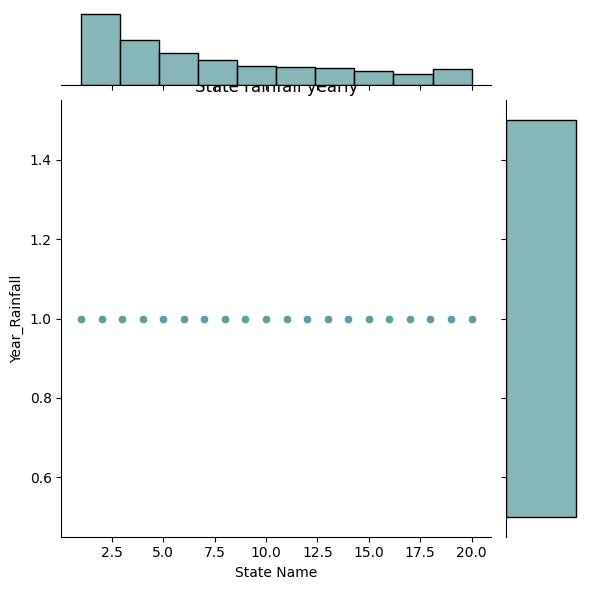

In [13]:
import seaborn as sns
sns.jointplot(data = df1 , x = 'State Name' , y='Year_Rainfall', color = 'cadetblue')
plt.title("State rainfall yearly")

Joint plot above describes the distribution of average rainfall of 30 years over different states which has been constant

<Axes: xlabel='SOIL TYPE PERCENT (Percent)', ylabel='Count'>

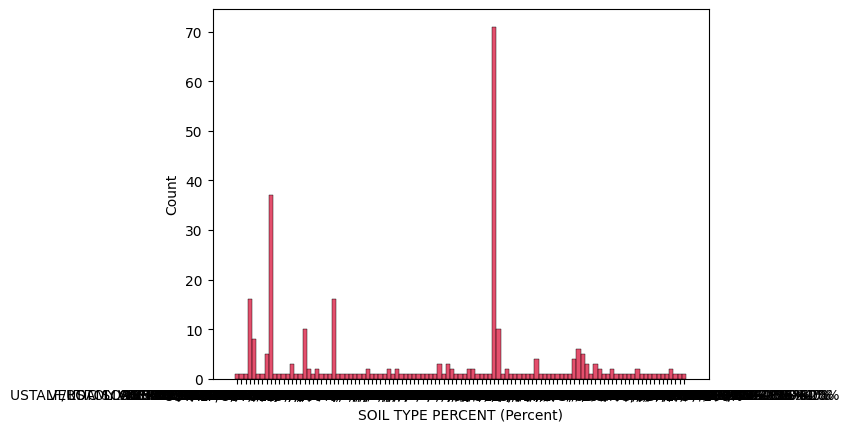

In [14]:
# observing the total percentage of different types of soils
sns.histplot(df1 , x="SOIL TYPE PERCENT (Percent)" , color='crimson')

Above histogram describes the distribution of a large variation of various types of soils due to which there is  overlapping on the x-axis

(12.0, 13.0)

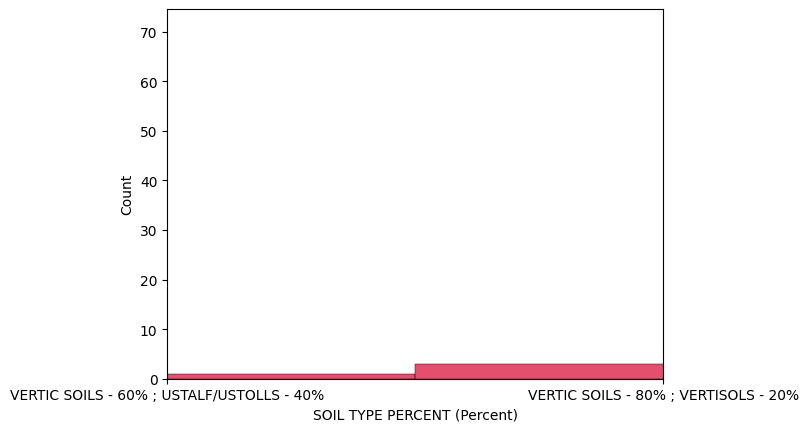

In [74]:
sns.histplot(df1 , x="SOIL TYPE PERCENT (Percent)" , color='crimson')
plt.xlim(12,13)

The above histogram describes the variation of various less number of soli types as compared to the previous histogram

<BarContainer object of 5 artists>

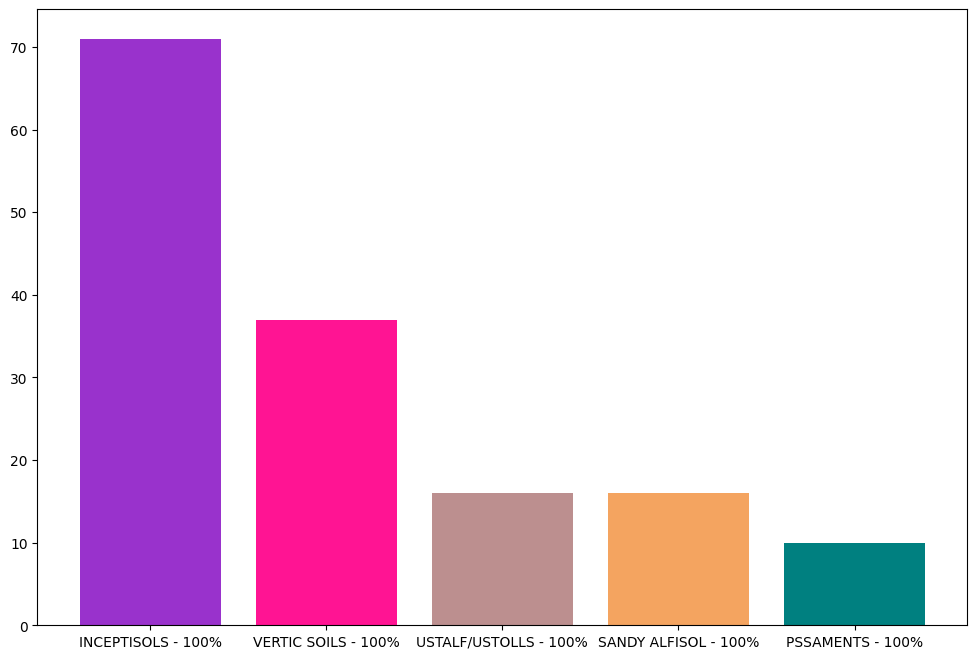

In [16]:
plt.figure(figsize=(12,8))
plt.bar(list(df1['SOIL TYPE PERCENT (Percent)'].value_counts()[0:5].keys()),list(df1['SOIL TYPE PERCENT (Percent)'].value_counts()[0:5]),color=['darkorchid','deeppink','rosybrown','sandybrown','teal'])

<Axes: xlabel='ANNUAL NORMAL RAINFALL (Millimeters)', ylabel='Count'>

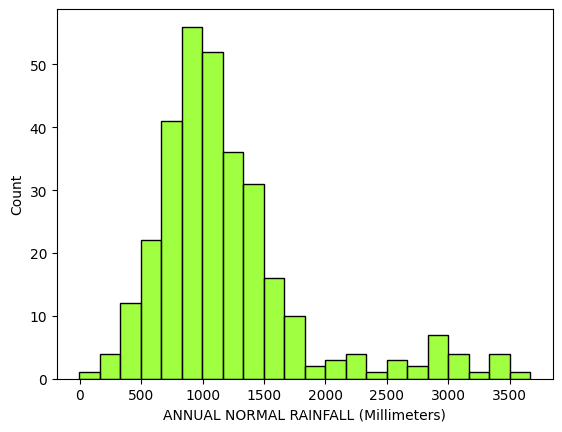

In [75]:
sns.histplot(df1 , x="ANNUAL NORMAL RAINFALL (Millimeters)" , color='chartreuse')

<Axes: xlabel='State Name', ylabel='ANNUAL NORMAL RAINFALL (Millimeters)'>

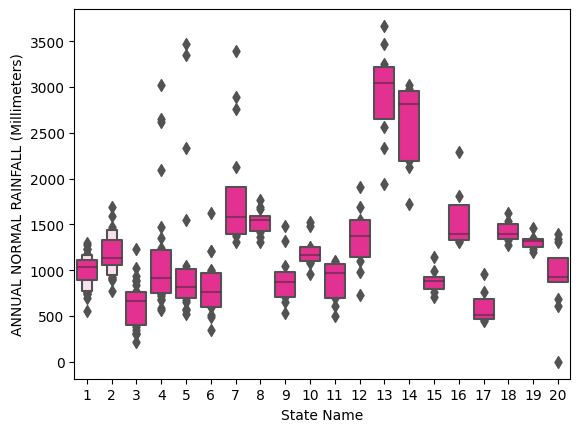

In [18]:
sns.boxenplot(df1 , x="State Name" , y='ANNUAL NORMAL RAINFALL (Millimeters)', color = 'deeppink')

Above histogram and Boxenplot describes the Distribution of annual rainfall in millimeters which shows that a larger portion of the data constitutes to rainfall between 500-1500 mm annually in different states in India.


RESULTS shows us that for soil types such as INCEPTISOLS 100% there is more annual rainfall required in millimeters.

In [19]:
df2.value_counts()

Year  Cotton_Price[Dollar/ton]
1975  1055.792518                 1
1976  1582.035312                 1
2001  951.734454                  1
2002  918.224230                  1
2003  0.000000                    1
2004  0.000000                    1
2005  0.000000                    1
2006  0.000000                    1
2007  0.000000                    1
2008  0.000000                    1
2009  0.000000                    1
2010  0.000000                    1
2011  0.000000                    1
2012  0.000000                    1
2013  0.000000                    1
2014  0.000000                    1
2015  0.000000                    1
2016  0.000000                    1
2017  0.000000                    1
2018  0.000000                    1
2019  0.000000                    1
2020  0.000000                    1
2021  0.000000                    1
2000  1332.472328                 1
1999  1211.879614                 1
1998  1524.274268                 1
1986  1174.621536                

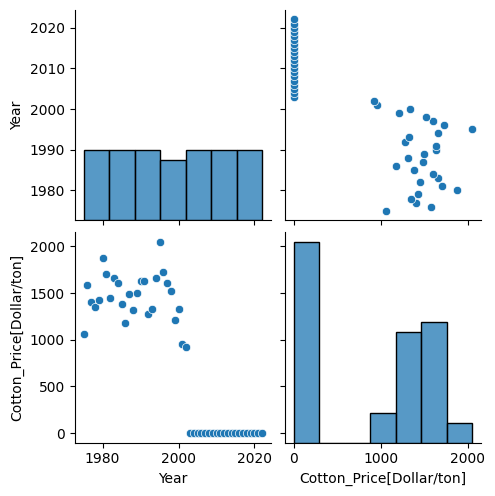

In [20]:
sns.pairplot(df2)

<Axes: xlabel='Year', ylabel='Count'>

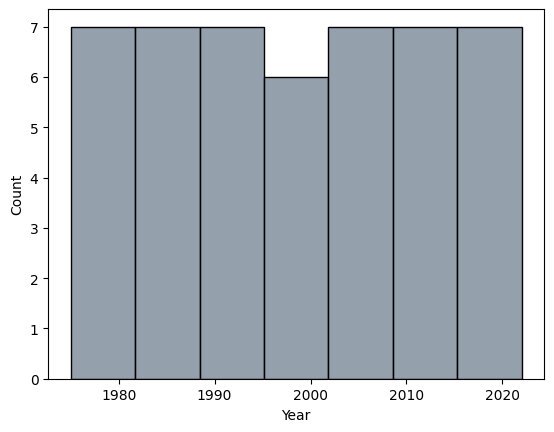

In [21]:
sns.histplot(df2 , x="Year" , color='slategrey')

Above histogram describes the years active where the USA cotton commodity was high The plot describes the years from 1980s too 2020 all time high prices except for a downfall in the early 2000s

<Axes: xlabel='Year', ylabel='Cotton_Price[Dollar/ton]'>

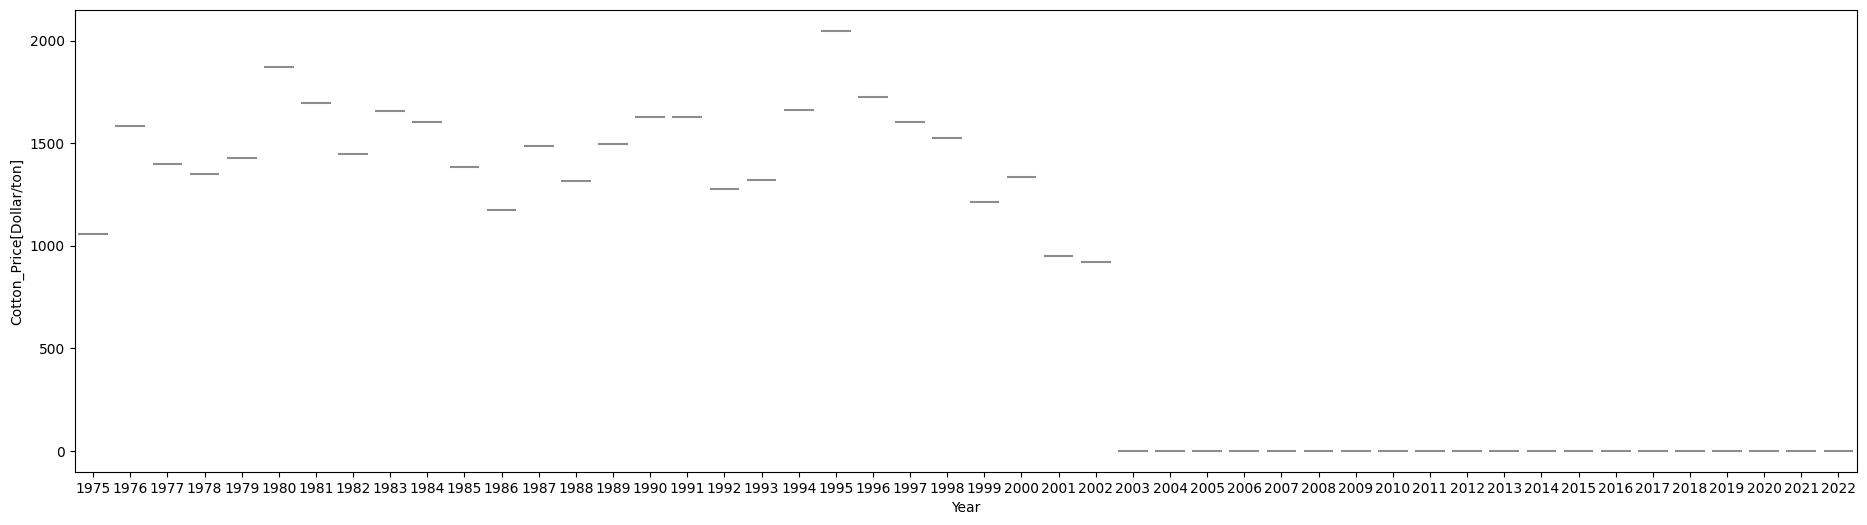

In [22]:
plt.figure(figsize=(23,6))
sns.boxenplot(df2 , x="Year" , y='Cotton_Price[Dollar/ton]', color = 'black')
#plt.xlim(12,13)
#plt.ylim(1000,2000)

<Axes: xlabel='Year', ylabel='Cotton_Price[Dollar/ton]'>

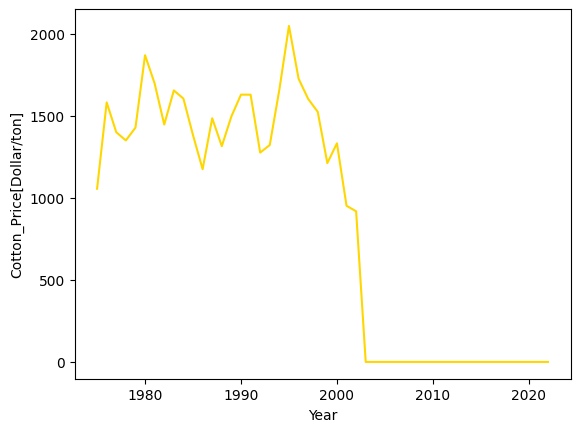

In [23]:
sns.lineplot(x="Year", y="Cotton_Price[Dollar/ton]" ,color='gold',data=df2)

Above Boxen plot and line plot  describes that the cotton prices in usa were having a variation from the early 1980s till 2003; but after 2003 it has fallen rapidly, declining till almost 0.

MODEL TRAINING

LINEAR REGRESSION ON INDIA SOIL DATA

In [24]:
# using linear regression algorithm
df3 = pd.read_csv('indiatrain.csv')
df3

,Year,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),TOTAL AREA (1000 ha),FOREST AREA (1000 ha),BARREN AND UNCULTIVABLE LAND AREA (1000 ha),LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha),PERMANENT PASTURES AREA (1000 ha),OTHER FALLOW AREA (1000 ha),NET CROPPED AREA (1000 ha),GROSS CROPPED AREA (1000 ha),CROPING INTENSITY (Percent),NITROGEN CONSUMPTION (tons),PHOSPHATE CONSUMPTION (tons),POTASH CONSUMPTION (tons),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha)
0,1990,0.0,0.0,0,903.31,130.36,104.08,112.64,NaN,12.75,498.96,627.26,129.12,31003.0,9306.0,1383.0,41684.0,85.21
1,1990,7.0,3.0,3333,1451.30,535.76,202.15,126.13,7.82,17.86,511.69,646.47,127.30,36622.0,6835.0,1363.0,44809.0,90.08
2,1990,49.0,238.0,4944,1083.84,327.24,84.49,113.25,30.71,23.00,448.80,698.74,160.64,NaN,21088.0,7882.0,NaN,303.24
3,1990,26.0,120.0,4964,780.54,85.19,50.32,93.54,27.32,43.99,447.61,627.21,143.94,109664.0,37972.0,18271.0,165898.0,375.97
4,1990,996.0,289.0,2892,883.69,68.40,66.33,114.89,22.17,36.84,505.26,736.47,150.33,88821.0,37910.0,NaN,139778.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,1994,0.0,0.0,0,375.00,2.70,0.00,NaN,0.00,NaN,290.10,3.00,3.00,24828.0,8530.0,7211.0,40560.0,142.76
1375,1994,0.0,0.0,0,343.50,9.80,4.55,NaN,3.04,4.32,249.90,0.00,3.00,20322.0,7683.0,5301.0,NaN,136.79
1376,1994,0.0,0.0,0,617.00,87.80,9.78,94.97,0.00,5.43,330.00,3.00,3.00,16346.0,8752.0,4958.0,30051.0,94.33
1377,1995,11.0,36.0,3403,903.00,131.00,98.00,121.50,8.50,12.00,511.00,698.00,138.47,39480.0,6929.0,2338.0,48744.0,96.57


<Axes: xlabel='COTTON PRODUCTION (1000 tons)', ylabel='Count'>

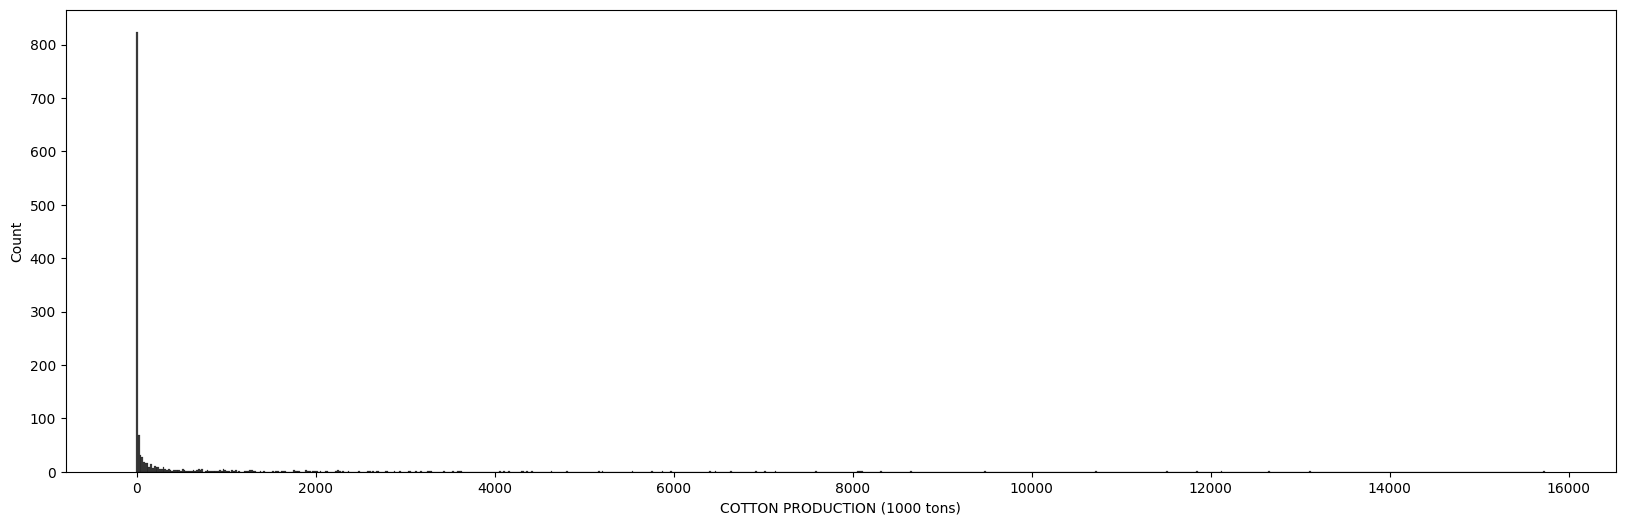

In [25]:
plt.figure(figsize=(20,6))
sns.histplot(df3 , x="COTTON PRODUCTION (1000 tons)" , color='black')

Cotton Production is denoted high in the early years

<Axes: xlabel='TOTAL AREA (1000 ha)', ylabel='Count'>

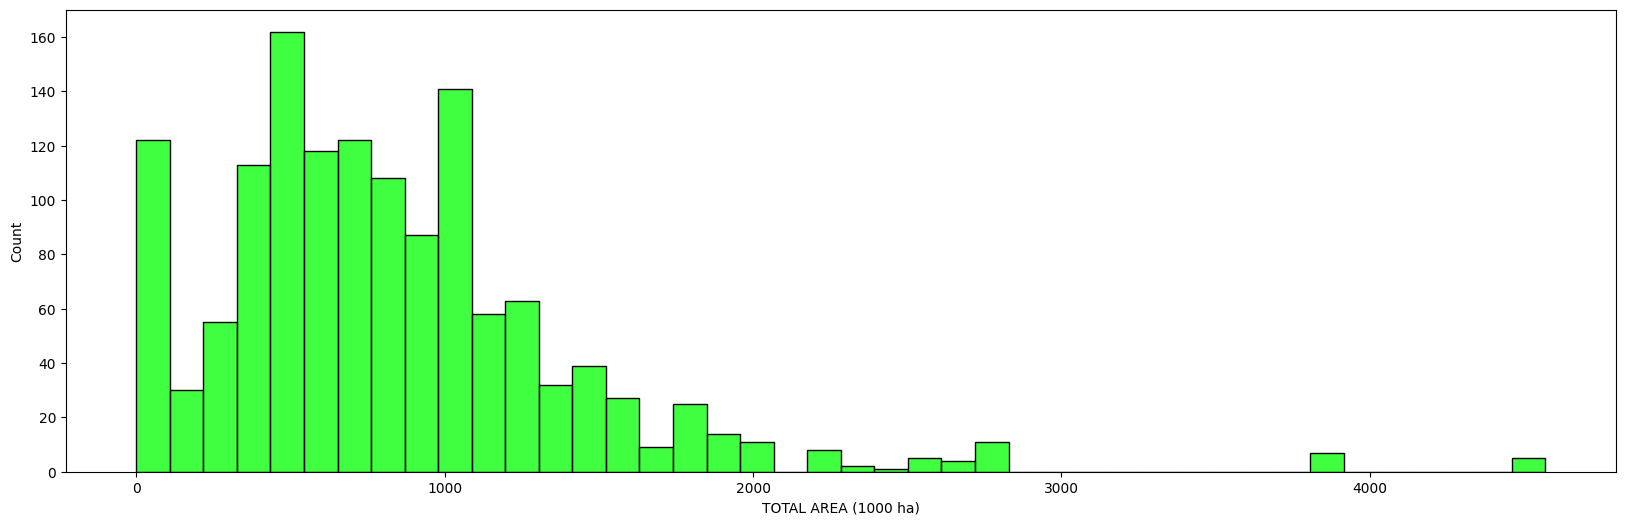

In [100]:
plt.figure(figsize=(20,6))
sns.histplot(df3 , x="TOTAL AREA (1000 ha)" , color='lime')

The total area is also observed to be more in the initial years as compared to latter.

<Axes: xlabel='FOREST AREA (1000 ha)', ylabel='Count'>

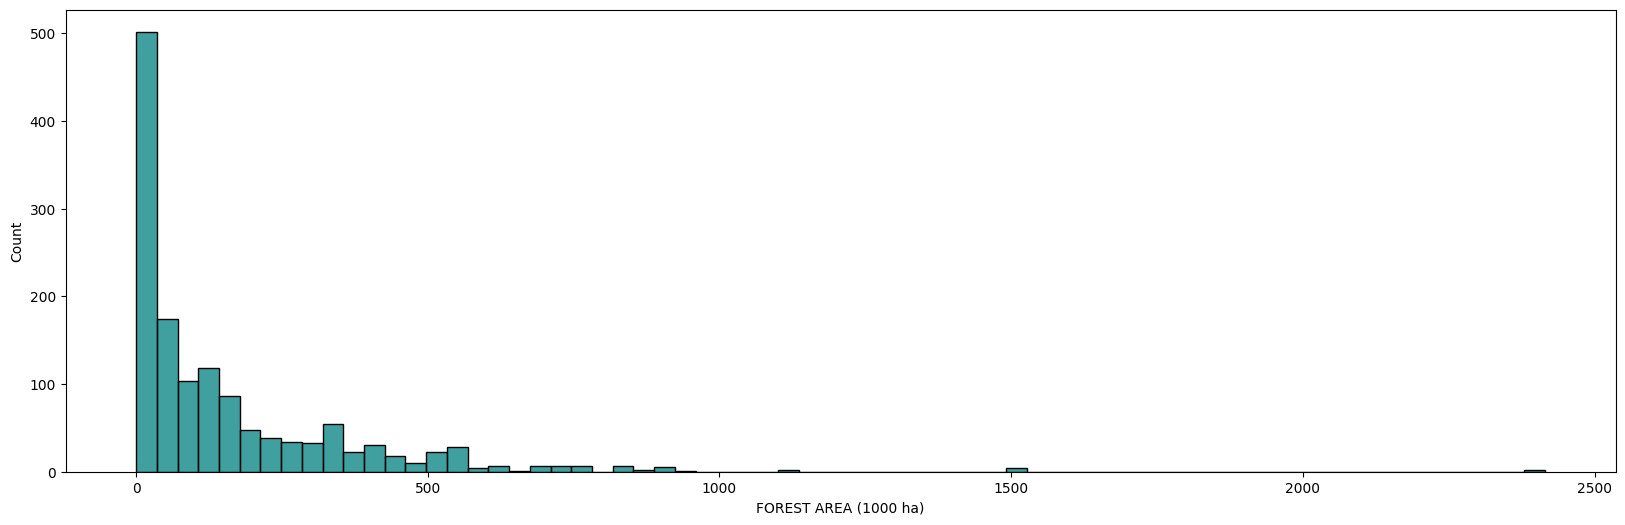

In [94]:
plt.figure(figsize=(20,6))
sns.histplot(df3 , x="FOREST AREA (1000 ha)" , color='teal')

Forest area is also observed to be higher in 1980-1995

<Axes: xlabel='FOREST AREA (1000 ha)', ylabel='Count'>

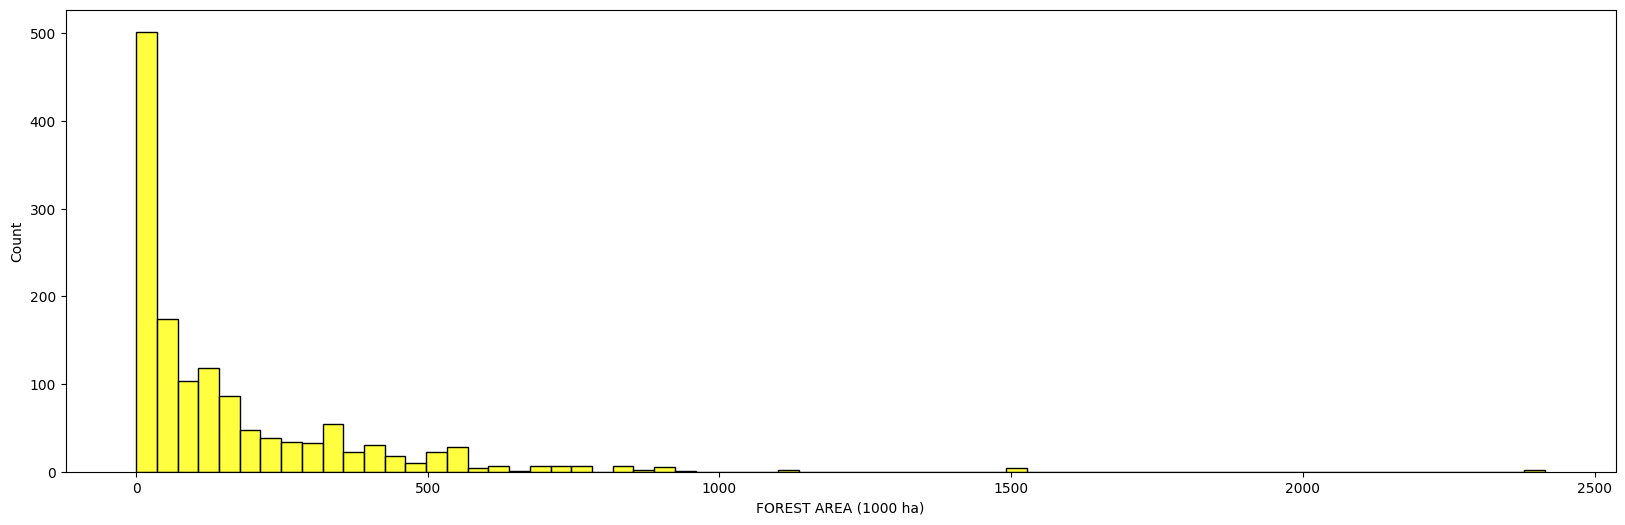

In [99]:
plt.figure(figsize=(20,6))
sns.histplot(df3 , x="FOREST AREA (1000 ha)" , color='yellow')

<Axes: xlabel='NET CROPPED AREA (1000 ha)', ylabel='Count'>

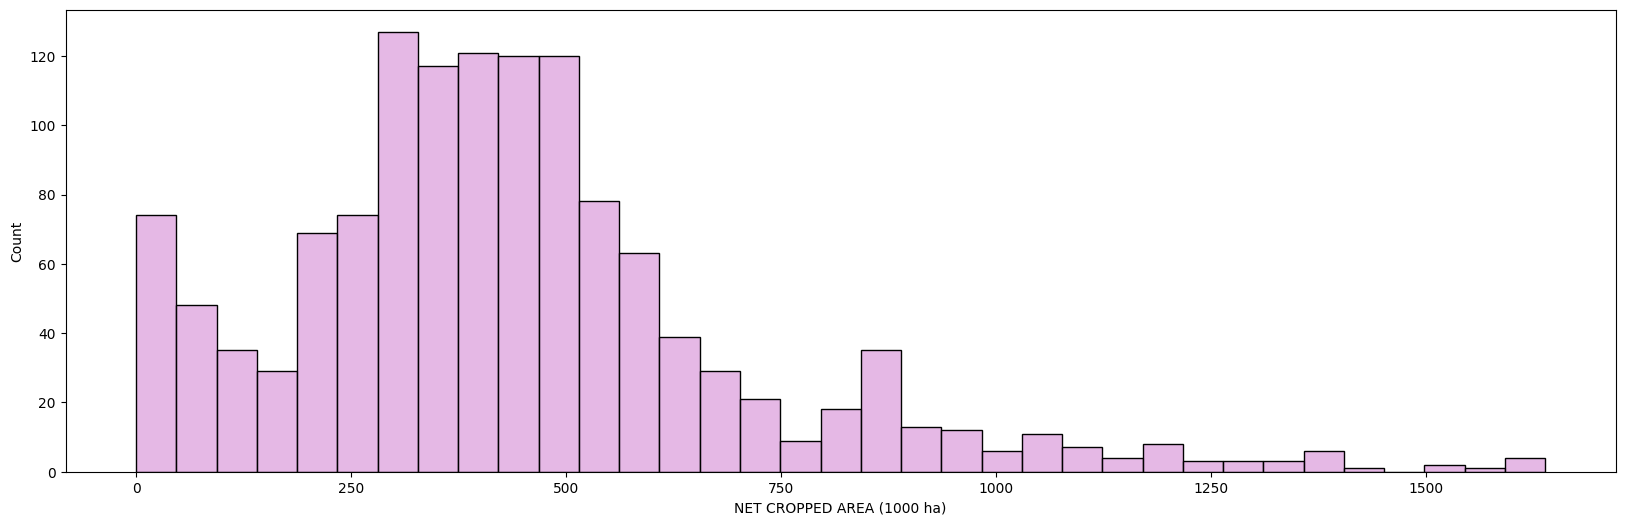

In [26]:
plt.figure(figsize=(20,6))
sns.histplot(df3 , x="NET CROPPED AREA (1000 ha)" , color='plum')

<Axes: xlabel='GROSS CROPPED AREA (1000 ha)', ylabel='Count'>

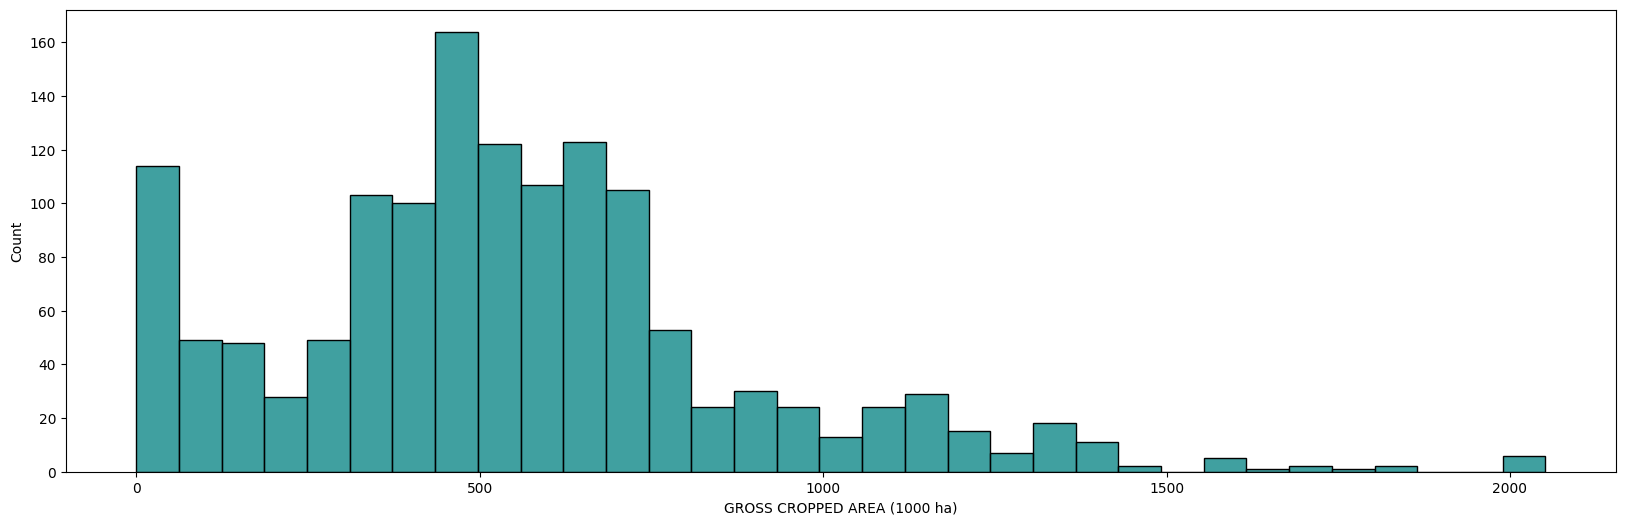

In [68]:
plt.figure(figsize=(20,6))
sns.histplot(df3 , x="GROSS CROPPED AREA (1000 ha)" , color='teal')

<Axes: xlabel='CROPING INTENSITY (Percent)', ylabel='Count'>

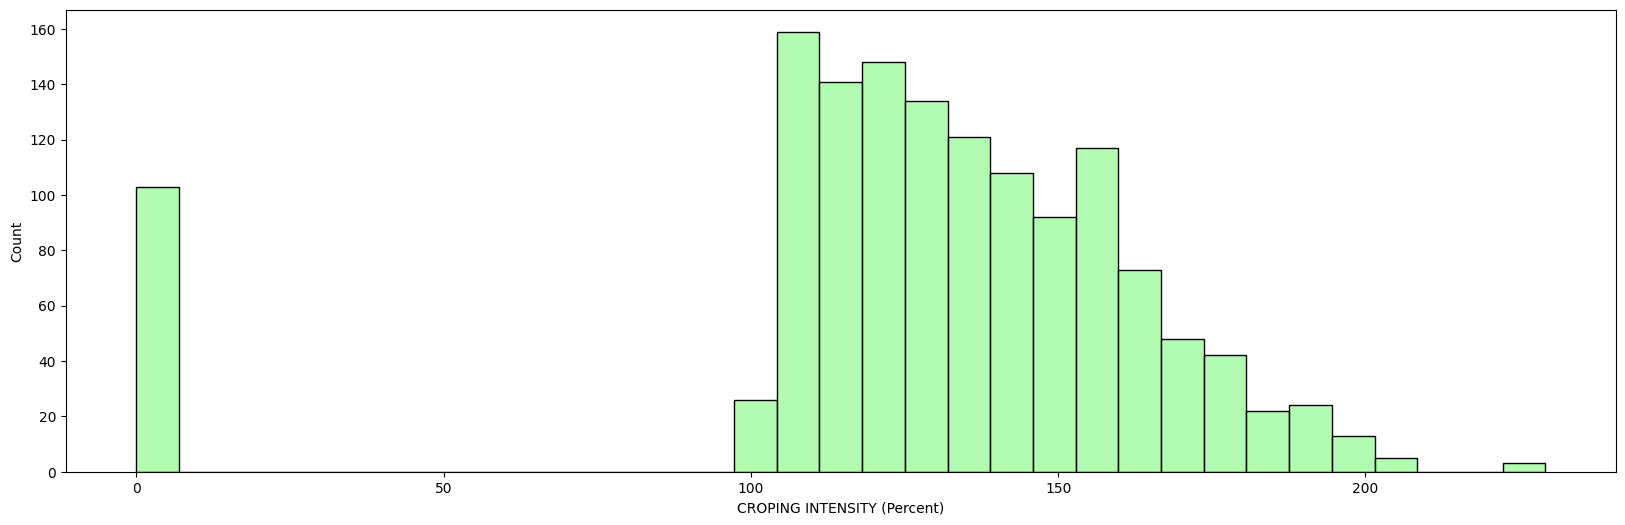

In [69]:
plt.figure(figsize=(20,6))
sns.histplot(df3 , x="CROPING INTENSITY (Percent)" , color='palegreen')

<Axes: xlabel='NITROGEN CONSUMPTION (tons)', ylabel='Count'>

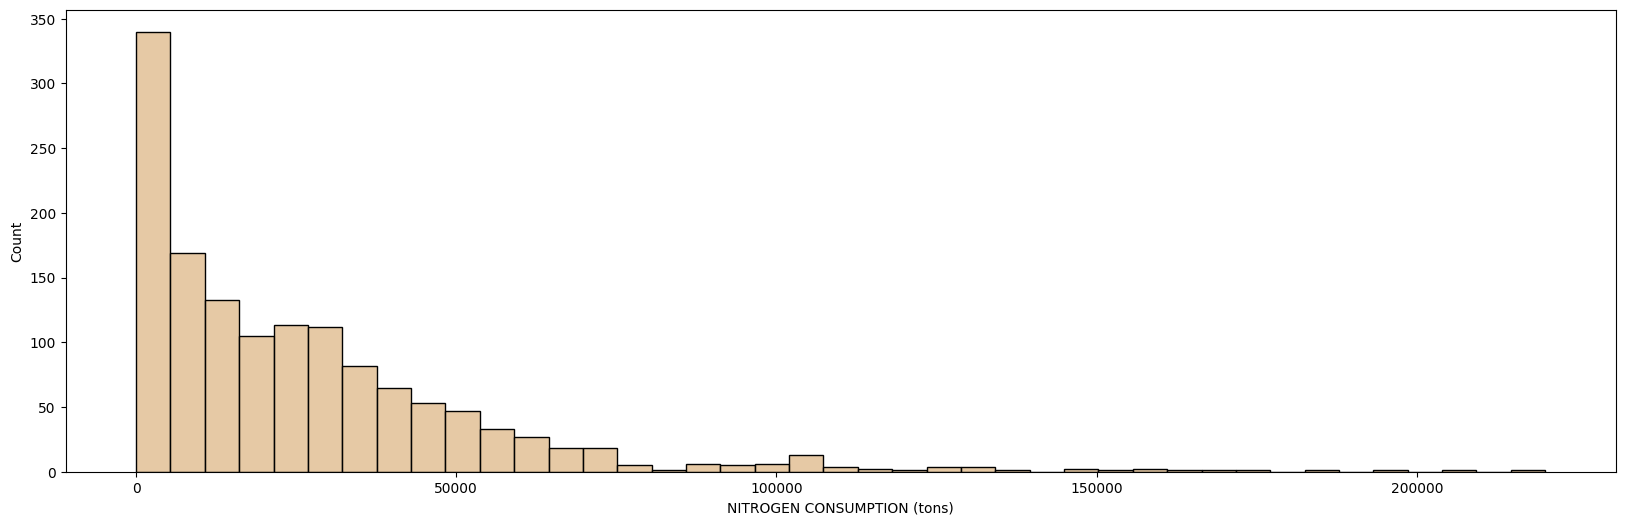

In [70]:
plt.figure(figsize=(20,6))
sns.histplot(df3 , x="NITROGEN CONSUMPTION (tons)" , color='burlywood')

<Axes: xlabel='PHOSPHATE CONSUMPTION (tons)', ylabel='Count'>

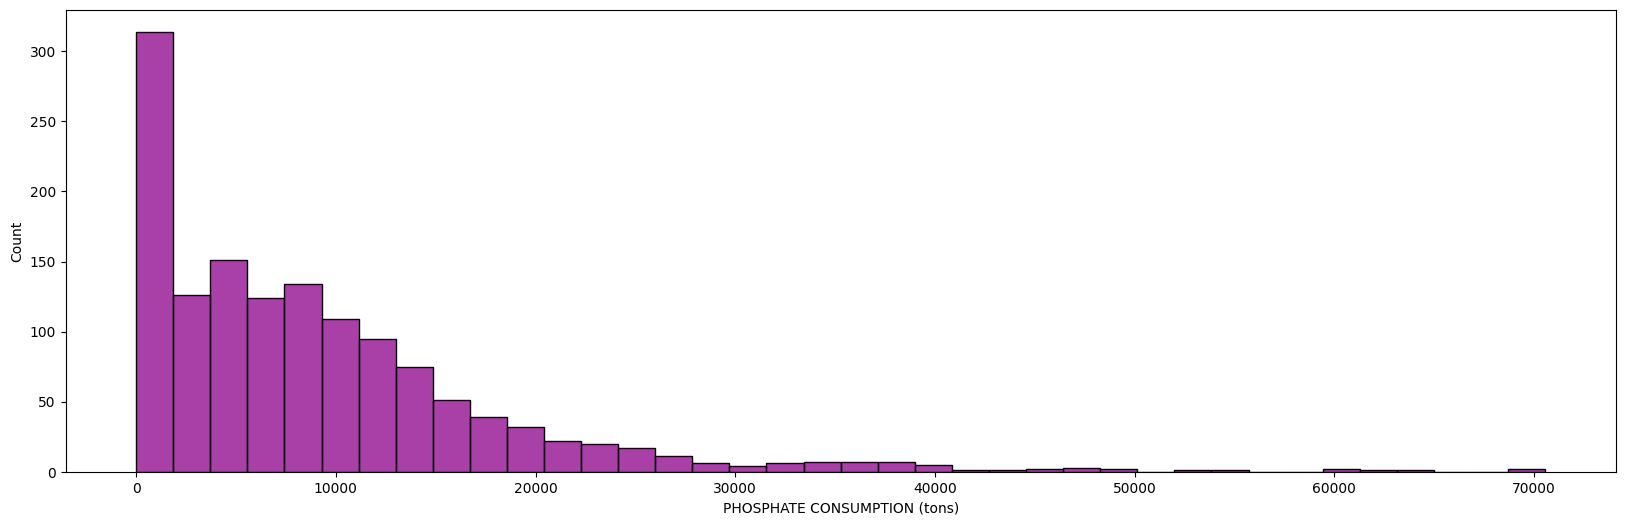

In [71]:
plt.figure(figsize=(20,6))
sns.histplot(df3 , x="PHOSPHATE CONSUMPTION (tons)" , color='darkmagenta')

<Axes: xlabel='POTASH CONSUMPTION (tons)', ylabel='Count'>

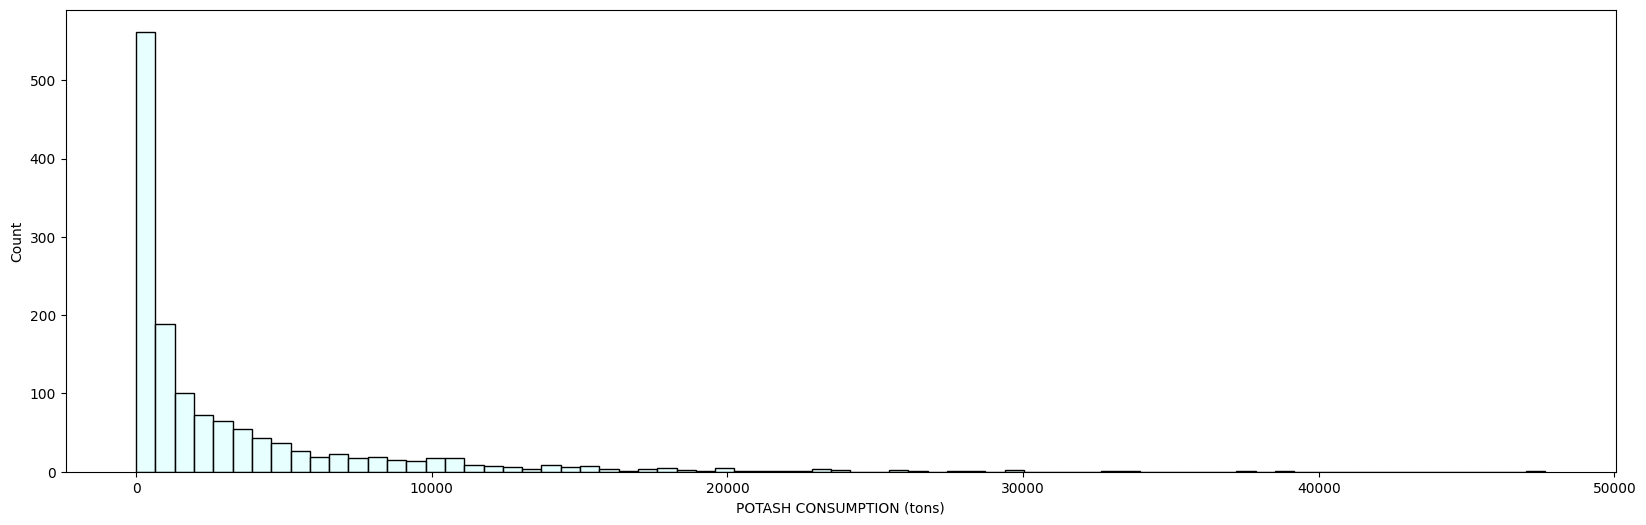

In [72]:
plt.figure(figsize=(20,6))
sns.histplot(df3 , x="POTASH CONSUMPTION (tons)" , color='lightcyan')

<Axes: xlabel='TOTAL CONSUMPTION (tons)', ylabel='Count'>

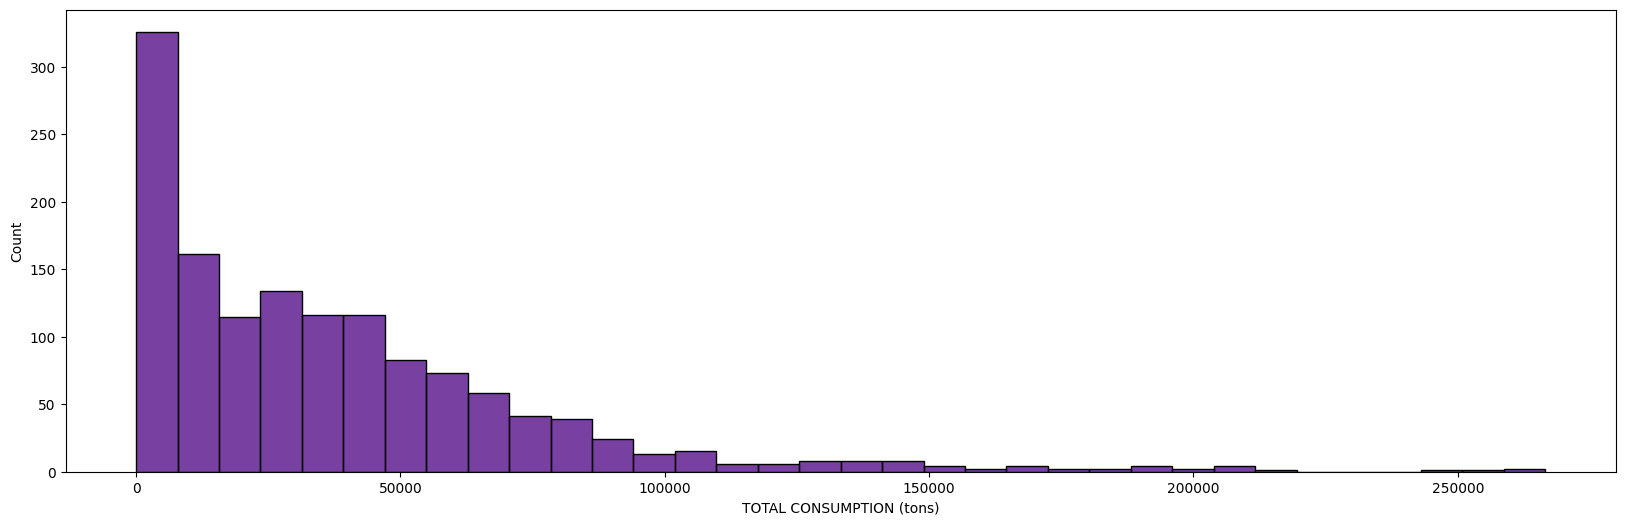

In [73]:
plt.figure(figsize=(20,6))
sns.histplot(df3 , x="TOTAL CONSUMPTION (tons)" , color='indigo')

The net cropped area is also to be higher before 2000s

In [42]:
X = df3.iloc[:,:-1].values  #independent variable array
y = df3.iloc[:,1].values

df3=df3.replace({'NAN':0})
df3  = df3.fillna(0)   # replacing nan values with zeros
df3

,Year,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),TOTAL AREA (1000 ha),FOREST AREA (1000 ha),BARREN AND UNCULTIVABLE LAND AREA (1000 ha),LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha),PERMANENT PASTURES AREA (1000 ha),OTHER FALLOW AREA (1000 ha),NET CROPPED AREA (1000 ha),GROSS CROPPED AREA (1000 ha),CROPING INTENSITY (Percent),NITROGEN CONSUMPTION (tons),PHOSPHATE CONSUMPTION (tons),POTASH CONSUMPTION (tons),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha)
0,1990,0.0,0.0,0,903.31,130.36,104.08,112.64,0.00,12.75,498.96,627.26,129.12,31003.0,9306.0,1383.0,41684.0,85.21
1,1990,7.0,3.0,3333,1451.30,535.76,202.15,126.13,7.82,17.86,511.69,646.47,127.30,36622.0,6835.0,1363.0,44809.0,90.08
2,1990,49.0,238.0,4944,1083.84,327.24,84.49,113.25,30.71,23.00,448.80,698.74,160.64,0.0,21088.0,7882.0,0.0,303.24
3,1990,26.0,120.0,4964,780.54,85.19,50.32,93.54,27.32,43.99,447.61,627.21,143.94,109664.0,37972.0,18271.0,165898.0,375.97
4,1990,996.0,289.0,2892,883.69,68.40,66.33,114.89,22.17,36.84,505.26,736.47,150.33,88821.0,37910.0,0.0,139778.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,1994,0.0,0.0,0,375.00,2.70,0.00,0.00,0.00,0.00,290.10,3.00,3.00,24828.0,8530.0,7211.0,40560.0,142.76
1375,1994,0.0,0.0,0,343.50,9.80,4.55,0.00,3.04,4.32,249.90,0.00,3.00,20322.0,7683.0,5301.0,0.0,136.79
1376,1994,0.0,0.0,0,617.00,87.80,9.78,94.97,0.00,5.43,330.00,3.00,3.00,16346.0,8752.0,4958.0,30051.0,94.33
1377,1995,11.0,36.0,3403,903.00,131.00,98.00,121.50,8.50,12.00,511.00,698.00,138.47,39480.0,6929.0,2338.0,48744.0,96.57


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [45]:
y_pred = regressor.predict(X_test)
y_pred

array([-2.03679101e-13,  5.10293740e-13,  2.00000000e+00,  1.35000000e+02,
       -4.14581778e-12, -1.05683569e-12,  1.73000000e+02,  4.60400000e+03,
       -4.54185036e-12,  2.50000000e+01,  3.80000000e+01,  2.17200000e+03,
       -6.31284460e-13,  2.16500000e+03,  1.70000000e+01,  5.00000000e+00,
       -2.46462026e-13,  3.00000000e+00,  3.05500000e+03,  5.00000000e+00,
        3.90000000e+01,  2.30581668e-13,  1.99000000e+02, -7.41994994e-13,
        3.94000000e+02,  4.00000000e+00,  7.33000000e+02, -2.20953453e-12,
        2.33900358e-13, -3.52400569e-12, -3.97955492e-13,  3.00000000e+00,
        9.02337573e-13,  5.42900000e+03,  1.67717401e-12,  4.00000000e+00,
       -7.30618086e-12, -2.50952901e-12, -2.29054838e-12,  1.20000000e+01,
       -1.31115744e-12,  4.28400000e+03,  5.24000000e+02,  1.99600000e+03,
       -1.97468866e-12,  4.00000000e+00, -5.66452003e-13,  2.00000000e+00,
       -4.37409815e-13, -1.72608588e-12, -8.95753113e-14,  8.52000000e+02,
        9.25000000e+02, -

In [46]:
y_test

array([0.0000e+00, 0.0000e+00, 2.0000e+00, 1.3500e+02, 0.0000e+00,
       0.0000e+00, 1.7300e+02, 4.6040e+03, 0.0000e+00, 2.5000e+01,
       3.8000e+01, 2.1720e+03, 0.0000e+00, 2.1650e+03, 1.7000e+01,
       5.0000e+00, 0.0000e+00, 3.0000e+00, 3.0550e+03, 5.0000e+00,
       3.9000e+01, 0.0000e+00, 1.9900e+02, 0.0000e+00, 3.9400e+02,
       4.0000e+00, 7.3300e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 3.0000e+00, 0.0000e+00, 5.4290e+03, 0.0000e+00,
       4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2000e+01,
       0.0000e+00, 4.2840e+03, 5.2400e+02, 1.9960e+03, 0.0000e+00,
       4.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 8.5200e+02, 9.2500e+02, 0.0000e+00, 9.0000e+00,
       0.0000e+00, 0.0000e+00, 2.0000e+00, 5.5000e+01, 1.9200e+02,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 7.7070e+03, 0.0000e+00, 2.8040e+03, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.5600e+02, 2.6620e+03, 0.0000e

HERE y_test is the actual data array of india soil train data and y_pred is the predicted data array

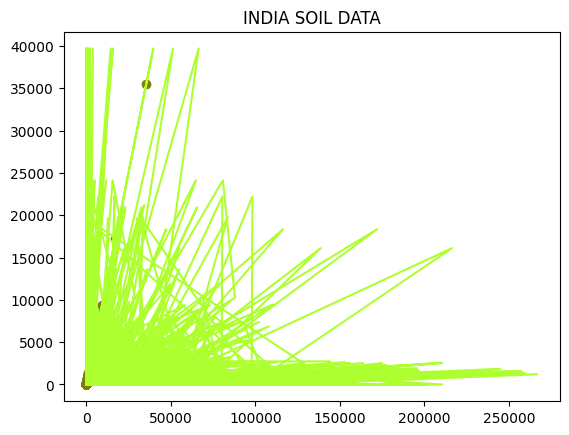

In [76]:
plt.scatter(y_pred, y_test, color='olive') # plotting the observation line

plt.plot(X_train, regressor.predict(X_train), color='greenyellow') # plotting the regression line

plt.title("INDIA SOIL DATA")

#plt.xlabel("Years of experience")
#plt.ylabel("Salaries")
plt.show()

Above observation describes how due to difference in forest area for crop production the comsumption, soils nutritional content and profit of cotton has declined over the years

MODEL EVALUATION

In [51]:
# predicting the mean absolute error
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 2.4755320017743695e-12


In [52]:
# predicting the mean squared error
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 1.4327796219398725e-23


In [53]:
# predicting the root mean squared error
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 3.7852075530145935e-12


In [ ]:
# predicting the root mean squared log error
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

In [54]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

1.0


Since the r2 score is 1 it indicates us that the linear regression model is improved.

LINEAR REGRESSION ON USA COTTON PRODUCTION DATA

In [40]:
# using linear regression algorithm
df4 = pd.read_csv('USA_train.csv')
df4

,Year,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
0,1975,385,370,406,66.825000,1.566667,75.066667,2.266667,54.566667,2.866667,...,224.916667,-1.083333,8.161667,6.840833,NaN,4.684167,6.132500,5.821667,4.857500,2.718333
1,1975,700,680,486,63.875000,2.225000,73.808333,1.208333,52.975000,3.258333,...,299.250000,8.750000,6.674167,6.331667,5.414167,4.894167,5.098333,3.680000,1.537500,3.382500
2,1975,NaN,268,1028,61.891667,-0.733333,74.483333,-0.291667,45.283333,0.850000,...,211.166667,43.416667,0.584167,0.403333,1.584167,0.375000,1.140833,2.805000,3.648333,0.893333
3,1975,900,875,1074,NaN,-0.383333,72.700000,-0.466667,46.825000,1.691667,...,303.083333,NaN,2.650000,4.479167,1.613333,4.324167,1.405000,2.100833,3.068333,2.322500
4,1975,4,4,347,73.208333,4.133333,83.983333,2.308333,64.408333,2.941667,...,49.916667,-6.666667,1.191667,1.801667,4.085000,1.762500,2.155000,1.778333,3.239167,3.455833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2002,200,180,560,60.416667,2.433333,75.133333,1.116667,50.708333,2.791667,...,316.333333,11.916667,4.065000,0.377500,1.434167,1.620833,1.524167,NaN,3.279167,4.037500
556,2002,290,200,316,65.700000,1.683333,76.058333,2.625000,53.325000,2.741667,...,217.916667,-1.666667,NaN,0.236667,-1.291667,-0.115833,-0.941667,-0.740000,2.412500,1.468333
557,2002,565,530,743,61.725000,1.683333,72.566667,4.408333,48.841667,4.941667,...,318.166667,-2.500000,3.680000,0.880833,2.127500,3.180000,2.747500,3.960000,4.494167,3.199167
558,2002,"5,600","4,500",541,67.025000,2.716667,80.941667,0.333333,57.100000,3.116667,...,170.000000,8.750000,4.174167,1.235833,0.911667,1.660833,1.031667,2.886667,4.301667,3.251667


In [41]:
X = df4.iloc[:,:-1].values  #independent variable array
y = df4.iloc[:,1].values

df4=df4.replace({'NAN':0})
df4  = df4.fillna(0)   # replacing nan values with zeros
df4

,Year,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
0,1975,385,370,406,66.825000,1.566667,75.066667,2.266667,54.566667,2.866667,...,224.916667,-1.083333,8.161667,6.840833,0.000000,4.684167,6.132500,5.821667,4.857500,2.718333
1,1975,700,680,486,63.875000,2.225000,73.808333,1.208333,52.975000,3.258333,...,299.250000,8.750000,6.674167,6.331667,5.414167,4.894167,5.098333,3.680000,1.537500,3.382500
2,1975,0,268,1028,61.891667,-0.733333,74.483333,-0.291667,45.283333,0.850000,...,211.166667,43.416667,0.584167,0.403333,1.584167,0.375000,1.140833,2.805000,3.648333,0.893333
3,1975,900,875,1074,0.000000,-0.383333,72.700000,-0.466667,46.825000,1.691667,...,303.083333,0.000000,2.650000,4.479167,1.613333,4.324167,1.405000,2.100833,3.068333,2.322500
4,1975,4,4,347,73.208333,4.133333,83.983333,2.308333,64.408333,2.941667,...,49.916667,-6.666667,1.191667,1.801667,4.085000,1.762500,2.155000,1.778333,3.239167,3.455833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2002,200,180,560,60.416667,2.433333,75.133333,1.116667,50.708333,2.791667,...,316.333333,11.916667,4.065000,0.377500,1.434167,1.620833,1.524167,0.000000,3.279167,4.037500
556,2002,290,200,316,65.700000,1.683333,76.058333,2.625000,53.325000,2.741667,...,217.916667,-1.666667,0.000000,0.236667,-1.291667,-0.115833,-0.941667,-0.740000,2.412500,1.468333
557,2002,565,530,743,61.725000,1.683333,72.566667,4.408333,48.841667,4.941667,...,318.166667,-2.500000,3.680000,0.880833,2.127500,3.180000,2.747500,3.960000,4.494167,3.199167
558,2002,"5,600","4,500",541,67.025000,2.716667,80.941667,0.333333,57.100000,3.116667,...,170.000000,8.750000,4.174167,1.235833,0.911667,1.660833,1.031667,2.886667,4.301667,3.251667


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred = regressor.predict(X_test)
y_pred

array([-2.03679101e-13,  5.10293740e-13,  2.00000000e+00,  1.35000000e+02,
       -4.14581778e-12, -1.05683569e-12,  1.73000000e+02,  4.60400000e+03,
       -4.54185036e-12,  2.50000000e+01,  3.80000000e+01,  2.17200000e+03,
       -6.31284460e-13,  2.16500000e+03,  1.70000000e+01,  5.00000000e+00,
       -2.46462026e-13,  3.00000000e+00,  3.05500000e+03,  5.00000000e+00,
        3.90000000e+01,  2.30581668e-13,  1.99000000e+02, -7.41994994e-13,
        3.94000000e+02,  4.00000000e+00,  7.33000000e+02, -2.20953453e-12,
        2.33900358e-13, -3.52400569e-12, -3.97955492e-13,  3.00000000e+00,
        9.02337573e-13,  5.42900000e+03,  1.67717401e-12,  4.00000000e+00,
       -7.30618086e-12, -2.50952901e-12, -2.29054838e-12,  1.20000000e+01,
       -1.31115744e-12,  4.28400000e+03,  5.24000000e+02,  1.99600000e+03,
       -1.97468866e-12,  4.00000000e+00, -5.66452003e-13,  2.00000000e+00,
       -4.37409815e-13, -1.72608588e-12, -8.95753113e-14,  8.52000000e+02,
        9.25000000e+02, -

In [57]:
y_test

array([0.0000e+00, 0.0000e+00, 2.0000e+00, 1.3500e+02, 0.0000e+00,
       0.0000e+00, 1.7300e+02, 4.6040e+03, 0.0000e+00, 2.5000e+01,
       3.8000e+01, 2.1720e+03, 0.0000e+00, 2.1650e+03, 1.7000e+01,
       5.0000e+00, 0.0000e+00, 3.0000e+00, 3.0550e+03, 5.0000e+00,
       3.9000e+01, 0.0000e+00, 1.9900e+02, 0.0000e+00, 3.9400e+02,
       4.0000e+00, 7.3300e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 3.0000e+00, 0.0000e+00, 5.4290e+03, 0.0000e+00,
       4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2000e+01,
       0.0000e+00, 4.2840e+03, 5.2400e+02, 1.9960e+03, 0.0000e+00,
       4.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 8.5200e+02, 9.2500e+02, 0.0000e+00, 9.0000e+00,
       0.0000e+00, 0.0000e+00, 2.0000e+00, 5.5000e+01, 1.9200e+02,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 7.7070e+03, 0.0000e+00, 2.8040e+03, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.5600e+02, 2.6620e+03, 0.0000e

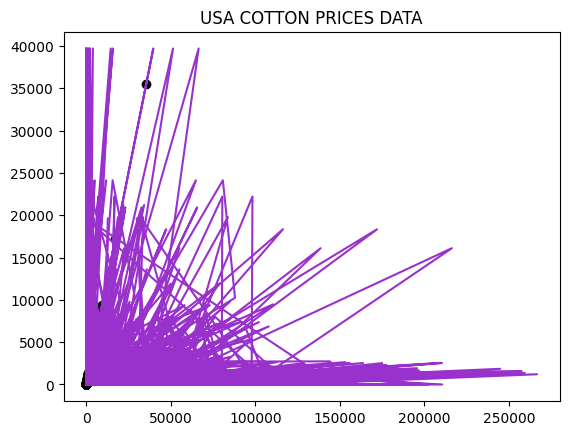

In [62]:
plt.scatter(y_pred, y_test, color='black') # plotting the observation line
plt.plot(X_train, regressor.predict(X_train), color='darkorchid') # plotting the regression line
plt.title("USA COTTON PRICES DATA")
plt.show()

In [63]:
# predicting the mean absolute error
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 2.4755320017743695e-12


In [64]:
# predicting the mean squared error
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 1.4327796219398725e-23


In [65]:
# predicting the root mean squared error
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 3.7852075530145935e-12


In [66]:
# predicting the root mean squared log error
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE -26.299920394871595


In [67]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

1.0


Results indicate that the soil variation in India has been deteriorated by climatic changes since the early 2000s. As compared to the late 1975s there was a presense of rich soil nutrients in the soil  which were producing maximum cotton production in and profitting USA with maximum prices. But, due to the climatic conditions globally the soil quality has been degraded which has vastly impacted cotton production due to which cotton prices have dropped along with way decreasing at the early peak of the 21st century. If the conditions of climate change are kept constant then there is high possibility of global warning. Hence, to combat such issues sustainability measurements are implemented.